In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#upoad data
prices=pd.read_csv("data:airbnb_price.csv")

In [7]:
xls=pd.ExcelFile("data:airbnb_room_type.xlsx")

In [8]:
room_types=xls.parse(0)

In [9]:
reviews=pd.read_csv("data:airbnb_last_review.tsv",sep="\t")

In [10]:
reviews.head(2)

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019


In [11]:
#replace dollars
prices["price"]=prices["price"].str.replace("dollars", " ")

In [12]:
#create free_listing from 0 values
free_listings=prices["price"]==0

In [13]:
#remove free listings
prices=prices.loc[~free_listings]

In [14]:
#convert rice column to numeric
prices["price"]=pd.to_numeric(prices["price"])

In [15]:
#average price
avg_price=round(prices["price"].mean(),2)
print(avg_price)

141.78


In [16]:
#create price per month column, price per month=365 days/12 months
prices["prices_per_month"]=prices["price"] * 365/12
prices.head(2)

,listing_id,price,nbhood_full,prices_per_month
0,2595,225,"Manhattan, Midtown",6843.750000
1,3831,89,"Brooklyn, Clinton Hill",2707.083333


In [17]:
#difference in avg price and avg price for NYC 3100
average_price_per_month = round(prices["prices_per_month"].mean(), 2)


In [18]:
difference = round((average_price_per_month - 3100),2)
print(difference)

1212.41


In [19]:
room_types.head(2)

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt


In [20]:
#convertroom_types to lower case
room_types["room_type"]=room_types["room_type"].str.lower()

In [21]:
room_types.head(1)

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,entire home/apt


In [22]:
# how many are there of each type of room
room_frequencies=room_types["room_type"].value_counts()

In [23]:
print(room_frequencies)

entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64


In [24]:
#change room_types to category
room_types["room_type"]=room_types["room_type"].astype("category")

In [25]:
reviews.head(2)

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019


In [26]:
#change last_review to date time
reviews["last_review"]=pd.to_datetime(reviews["last_review"])
first_reviewed = reviews["last_review"].dt.date.min()
last_reviewed = reviews["last_review"].dt.date.max()

In [27]:
print(first_reviewed,last_reviewed)

2019-01-01 2019-07-09


In [28]:
#merge datasets
rooms_and_prices=prices.merge(room_types,how="outer",on="listing_id")

In [29]:
airbnb_merged=rooms_and_prices.merge(reviews,how="outer",on="listing_id")

In [30]:
airbnb_merged.head(2)

,listing_id,price,nbhood_full,prices_per_month,description,room_type,host_name,last_review
0,2595,225,"Manhattan, Midtown",6843.750000,Skylit Midtown Castle,entire home/apt,Jennifer,2019-05-21
1,3831,89,"Brooklyn, Clinton Hill",2707.083333,Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,2019-07-05


In [31]:
#check columns and rows of new data set
airbnb_merged.shape

(25209, 8)

In [32]:
#checking statistics
airbnb_merged.describe()

,listing_id,price,prices_per_month
count,2.520900e+04,25209.000000,25209.000000
mean,2.068922e+07,141.777936,4312.412234
std,1.102928e+07,147.349137,4481.869579
min,2.595000e+03,0.000000,0.000000
25%,1.202273e+07,69.000000,2098.750000
50%,2.234391e+07,105.000000,3193.750000
75%,3.037669e+07,175.000000,5322.916667
max,3.645581e+07,7500.000000,228125.000000


In [33]:
airbnb_merged.duplicated().sum()
#check for duplicates

0

In [34]:
#check for missing values
airbnb_merged.isnull().sum()

listing_id           0
price                0
nbhood_full          0
prices_per_month     0
description         10
room_type            0
host_name            8
last_review          0
dtype: int64

In [35]:
#drop null values
airbnb_merged.dropna(inplace=True)

In [36]:
df_airbnb=airbnb_merged

In [37]:
df_airbnb.columns

Index(['listing_id', 'price', 'nbhood_full', 'prices_per_month', 'description',
       'room_type', 'host_name', 'last_review'],
      dtype='object')

In [38]:
#extract borough from nbhoo_full column
df_airbnb["borough"] = df_airbnb["nbhood_full"].str.partition(",")[0]

In [39]:
df_airbnb.head(1)

,listing_id,price,nbhood_full,prices_per_month,description,room_type,host_name,last_review,borough
0,2595,225,"Manhattan, Midtown",6843.75,Skylit Midtown Castle,entire home/apt,Jennifer,2019-05-21,Manhattan


In [125]:
#group the DataFrame df_airbnb by the "borough" column 
#and calculate the stats of the "price" column for each borough. 
boroughs = df_airbnb.groupby("borough")["price"].agg(["sum", "mean", "median", "count"])

In [126]:
#rounds the values to two decimal places
#and sorts the DataFrame based on the mean in desc order
boroughs = boroughs.round(2).sort_values("mean", ascending=False)

In [127]:
#create label names and ranges for the labels
label_names = ["Budget", "Average", "Expensive", "Extravagant"]

In [128]:
ranges = [0, 69, 175, 350, np.inf]

In [129]:
#assigns the appropriate label to each "price"
#value based on the defined ranges.
df_airbnb["price_range"] = pd.cut(df_airbnb["price"],bins=ranges, labels=label_names)

In [130]:
prices_by_borough = df_airbnb.groupby(["borough", "price_range"])["price_range"].count()


In [137]:
df_airbnb.head(1)

,listing_id,price,nbhood_full,prices_per_month,description,room_type,host_name,last_review,borough,price_range
0,2595,225,"Manhattan, Midtown",6843.75,Skylit Midtown Castle,entire home/apt,Jennifer,2019-05-21,Manhattan,Expensive


In [142]:
#creates a dictionary named solution
solution = {'avg_price':avg_price,
            'average_price_per_month': average_price_per_month,  
            'difference':difference,          
            'room_frequencies':room_frequencies, 
            'first_reviewed': first_reviewed,
            'last_reviewed': last_reviewed,
            'prices_by_borough':prices_by_borough}
print(solution)

{'avg_price': 141.78, 'average_price_per_month': 4312.41, 'difference': 1212.41, 'room_frequencies': entire home/apt    13266
private room       11356
shared room          587
Name: room_type, dtype: int64, 'first_reviewed': datetime.date(2019, 1, 1), 'last_reviewed': datetime.date(2019, 7, 9), 'prices_by_borough': borough        price_range
Bronx          Budget          381
               Average         285
               Expensive        25
               Extravagant       5
Brooklyn       Budget         3194
               Average        5532
               Expensive      1466
               Extravagant     259
Manhattan      Budget         1148
               Average        5285
               Expensive      3072
               Extravagant     810
Queens         Budget         1631
               Average        1505
               Expensive       291
               Extravagant      28
Staten Island  Budget          124
               Average         123
               Expensive  

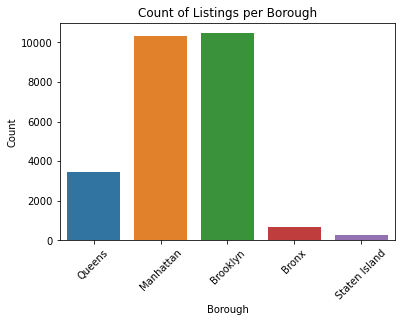

In [43]:


# Plotting the count plot
sns.countplot(data=df_airbnb, x='borough')

# Adding labels and title
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('Count of Listings per Borough')

# Rotating x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Displaying the count plot
plt.show()


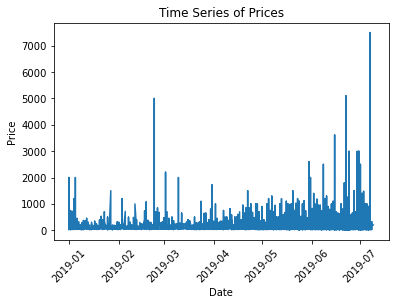

In [44]:
# Sort the DataFrame by the "last_review" column in ascending order
df_airbnb.sort_values('last_review', inplace=True)

# Plotting the time series
plt.plot(df_airbnb['last_review'], df_airbnb['price'])

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series of Prices')

# Rotating x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Displaying the time series plot
plt.show()
